In [1]:
#importing necessary libaries
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#path to image
path = 'D:\MACHINE VISION\QUIZ 2\lego1.png'

#read the image
img = cv2.imread(path,0) 
#define kernel
kernel = np.ones((5,5),np.uint8)


#binarizes the image 
_, mask = cv2.threshold(img, 100,255,cv2.THRESH_BINARY_INV)

#Add iteration to dilation so that it can removes the black dot inside the white lego image
dilation = cv2.dilate(mask, kernel, iterations=2)
#erodes away the boundry of the foreground object
erosion = cv2.erode(mask, kernel, iterations=1)

#removes any noise in the background (erosion, dilation)
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
#required as there was a random pixels that were registered (refer to Thresholding image - 1 small pixel is shown)

#increases the kernel size to remove any empty spaces within the lego brick
kernel = np.ones((8,8),np.uint8)

#removes any noise within the objects (dilation, erosion)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

#gets the outline via the difference between dilation and erosion of an image
#gradient = cv2.morphologyEx(closing, cv2.MORPH_GRADIENT, kernel)

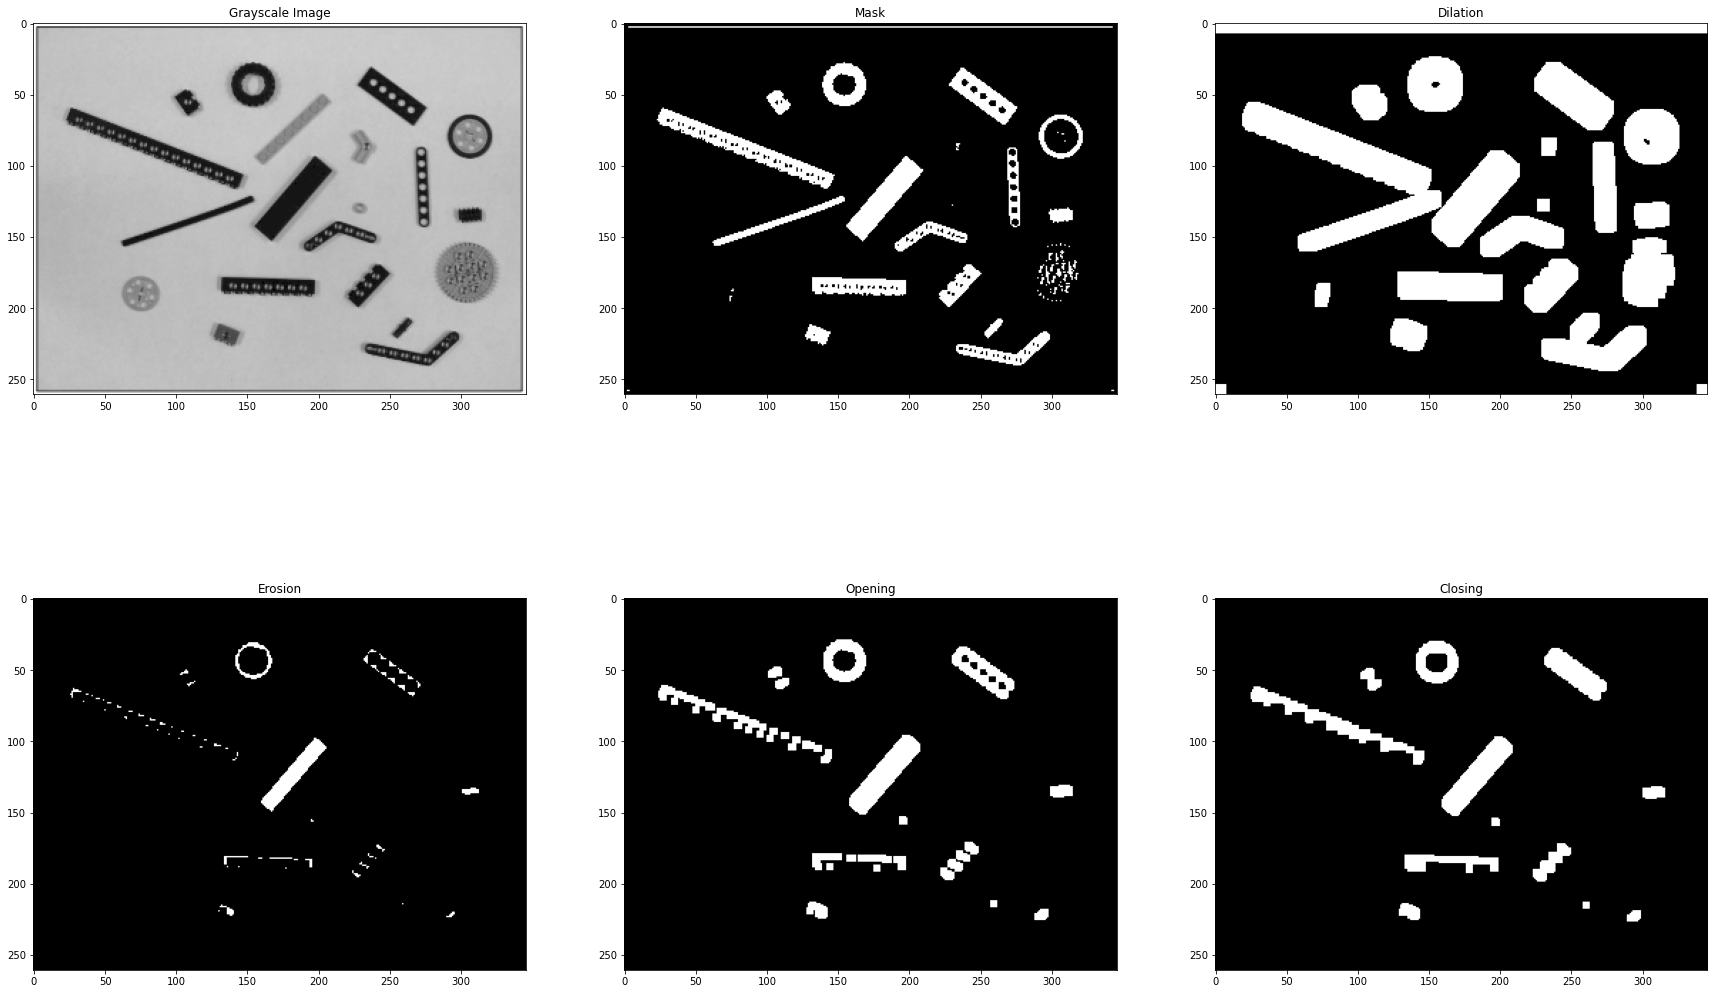

In [3]:
plt.figure(figsize=[30,30])
plt.subplot(331);plt.imshow(img,cmap='gray');plt.title('Grayscale Image');
plt.subplot(332);plt.imshow(mask,cmap='gray');plt.title('Mask');
plt.subplot(333);plt.imshow(dilation,cmap='gray');plt.title('Dilation');
plt.subplot(334);plt.imshow(erosion,cmap='gray');plt.title('Erosion');
plt.subplot(335);plt.imshow(opening,cmap='gray');plt.title('Opening');
plt.subplot(336);plt.imshow(closing,cmap='gray');plt.title('Closing');
#plt.subplot(427);plt.imshow(gradient,cmap='gray');plt.title('Gradient');

In [4]:
contours, hierarchy= cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
num = len(contours)

#Parameters:
#1.Source Image
#2.Retrieval Method. only gets the extreme outer contours so it ignores any contours inside
#3.Approximation Method, none, takes all the boundary points stored.


#Counts the only the outside contour lines in the CLOSING Image, thereby ignoring any noise
#in the contour lines.

In [5]:
#Final Answer
print("There are %s Lego Bricks in this Picture" % num) 

There are 12 Lego Bricks in this Picture


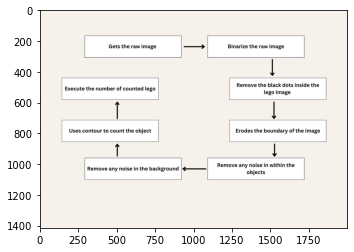

In [6]:
flowchart = plt.imread('D:\MACHINE VISION\QUIZ 2\Flowchart.png')
plt.imshow(flowchart)